<div style="margin-bottom:-35px;">
    <font color=#690027 markdown="1">
        <h1> <center> Gebaseerd op een cursus van:</center> </h1> 
    </font>
    <a href="https://www.aiopschool.be/chatbot/"> 
        <img src="../_afbeeldingen/bannerugentdwengo.png" alt="Dwengo" style ="display: block; margin-left: auto; margin-right: auto; margin-bottom: 30px; width:20%"/>
    </a>
</div>

<div style="margin-bottom:-35px;">
    <font color=#690027 markdown="1">
        <h1>1. Wat is Objectdetectie?</h1> 
    </font>
</div>

<div class="alert alert-box alert-success">
Hoewel objectdetectiesystemen tegenwoordig al op heel wat plaatsen gebruikt worden in de maatschappij, zijn er toch nog heel wat verbeteringen mogelijk. In deze Notebook kom je we wat meer te weten over de basiswerking van een objectdetectiesysteem. 

<div class="alert alert-box alert-info">
    Objectdetectie kan worden gedefinieerd als een computervisietechniek die tot doel heeft objecten op een afbeelding of video te lokaliseren en a.d.h.v. een classificatietechniek te identificeren. 
</div>

Deze techniek wordt bijvoorbeeld toegepast door de politie bij het oplossen van een misdrijf. Een computersysteem kan namelijk veel sneller werken dan een mens. Toch is het niet zo eenvoudig voor een computer om een object op afbeelding te herkennen. Dit komt doordat de computer op een andere manier naar een afbeelding kijkt. 

<div style="margin-bottom:-35px;">
    <font color=#690027 markdown="1">
        <h2>2. Inleiding</h2> 
    </font>
</div>

Een computer werkt binair: een computer zal dus geen afbeelding te zien krijgen zoals wij die zien, maar wel allemaal getallen (zie onderstaande afbeeldingen). Dit werkt als volgt:<br> Een afbeelding bestaat uit pixels. Iedere pixel heeft een bepaalde kleur; die kleur kan worden voorgesteld door een reeks getallen. 

Doordat een computer dus met getallen werkt, zal het moeilijker zijn voor een computer om een voorwerp te herkennen dan voor de mens.

<div style="background-color:#000065">
    Een computer ziet enkel een digitale representatie van een afbeelding. De betekenis van wat er te zien is, ontgaat de computer.
</div>

<table><tr>
<td><figure>
  <img src="../_afbeeldingen/beeldcomputer.jpg" alt="Trulli" width="400"/>
   <center>"Zien": Mens vs Computer</center> 
    </figure></td>
<td><figure>
  <img src="../_afbeeldingen/watcomputerziet.png" alt="Trulli" height="200">
  <center>"Zien": Mens vs Computer</center>
</figure></td>
</tr></table>

#### Oefen mee 2.1

Welk object zie je op de onderstaande onscherpe afbeelding?<br><br>
**Antwoord:** 

  <img src="../_afbeeldingen/wazigeafbeelding1.jpg" alt="Trulli" style ="display: block; margin-left: auto; margin-right: auto; margin-bottom: 10px; width:30%">


Welk object zie je op deze?<br><br>
**Antwoord:** 


  <img src="../_afbeeldingen/wazigeafbeelding2.jpg" alt="Trulli" style ="display: block; margin-left: auto; margin-right: auto; margin-bottom: 10px; width:30%">


Op beide figuren is hetzelfde voorwerp zichtbaar, maar op de tweede figuur is het voorwerp 90 graden gedraaid. Waarom identificeer je het object op de eerste afbeelding niet als een liggend persoon? Misschien omdat je de link legt met de straat die zichtbaar is op de figuur? 

<div style="background-color:#000065">
Terwijl het voor een mens vanzelfsprekend is om objecten te linken aan de omgeving en de context waar deze zich in bevinden, is dit voor een algoritme veel complexer. Hierin bevindt zich dus nog een extra moeilijkheid bij het detecteren en identificeren van objecten.  
</div>

In deze Notebook ontwikkel je een algoritme dat wiskundige vormen kan herkenen. Objectdetectie kan op veel verschillende manieren worden uit gevoerd, hier zal een `regelgebaseerde (AI) techniek` besproken worden.

<div style="margin-bottom:-35px;">
    <font color=#690027 markdown="1">
        <h2>3. Modules installeren en importeren</h2> 
    </font>
</div>

<div style="background-color:#000065"> 
<p>Je zal gebruikmaken van opencv. OpenCV-Python is een module ontworpen om computervisieproblemen op te lossen. Deze bevat reeds voorgeprogrammeerde functies die kunnen gebruikt worden voor objectverwerking, -verdeling, -detectie, -herkenning, ...

Hiernaast installeer je ook numpy en matplotlib om verdere oefeningen uit te voeren. Numpy is een module die een scala aan wiskundige en wetenschappelijke functies aanbied. De werking van matplotlib kennen jullie ondertussen wel. 
</div>

<div style="background-color:#8B0000"> 
Wees zeker dat je rechtsboven de juiste environment hebt geselecteerd vooraleer opencv te installeren.
</div>

In [2]:
# installeren van module opencv
%pip install opencv-python
# installeren van module numpy
%pip install numpy
# installeren van module matplotlib
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [3]:
# nodige modules importeren
import cv2
import numpy as np
from matplotlib import pyplot as plt

<div style="margin-bottom:-35px;">
    <font color=#690027 markdown="1">
        <h2>4. Foto inladen</h2> 
    </font>
</div>

Om het objectiedetectiealgoritme te laten werken heb je een afbeelding nodig. Voor deze Notebook heb je de afbeelding `vormen.png` ter beschikking in de map `_afbeeldingen`. 

In het stuk code hieronder staat een functie om de afbeelding weer te geven. Voer de code-cel uit.

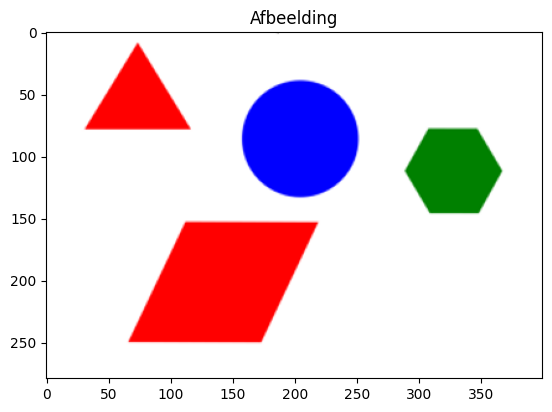

In [5]:
#functie om afbeelding weer te geven
def plt_imshow(title, image):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.imshow(image)
    plt.title(title)
    plt.grid(False)
    plt.show()

# inlezen afbeelding (Controleer je pad!)
vormen = cv2.imread("../_afbeeldingen/vormen.png")

# oproepen van functie plt_show
plt_imshow("Afbeelding", vormen)

### Oefen mee 4.1
-  Welke wiskundige vormen herken je? 
-  Hoe herken je deze vormen? Wat zijn de eigenschappen van de vormen waarop je gelet hebt?
-  Is er een eigenschap die voor geen enkel van de vormen hetzelde is?

**Antwoord:**


<div style="margin-bottom:-35px;">
    <font color=#690027 markdown="1">
        <h2>5. Algoritme voor vormdetectie</h2> 
    </font>
</div>

<div style="margin-bottom:-35px;">
    <font color=#690027 markdown="1">
        <h3>5.1 Algemene uitleg</h3> 
    </font>
</div>


Net zoals jij in `oefen mee 4.1` deed. Zal het algoritme ook aan de hand van eigenschappen werken om de vorm te herkennen. Wij denken hier niet zo diep meer bij na, maar het is doordat we bepaalde eigenschappen hebben aangeleerd dat het herkennen van de figuren zo vlot verloopt. Zo herkennen we bovenstaande figuren aan de hand van het aantal hoeken, aan het aantal evenwijdige zijden ...  Wij kunnen de eigenschappen makkelijk zien op het eerste zicht. Een computer, zoals hier besproken, kan echter enkel de getallen "zien". 

Wij moeten het algoritme dus aangeven hoe het een bepaalde figuur kan herkennen. Dit door te zeggen op welke eigenschap het moet letten. We kunnen het voor deze implementatie simpel houden. Iedere vorm heeft een ander aantal zijden. We kunnen ons daarom baseren op een `regelgebaseerde implementatie`. 

<div style="background-color:#8B0000"> 
Bedenk dat onze huidige implementatie dom is... er bestaan meerdere vormen met bvb. 4 zijden.
De implementatie werkt dus enkel voor deze specifieke afbeelding.
</div>

<div style="margin-bottom:-35px;">
    <font color=#690027 markdown="1">
        <h3>5.2 Afbeelding converteren naar grijswaarden</h3> 
    </font>
</div>


Iedere pixel op een afbeelding bestaat uit 3 getallen tussen 0 en 255 (**RGB**). Dit grootte aantal getallen verwerken kan zeer belastend zijn. Om de processor te sparen kan de computer de afbeelding eerst omzetten naar een `grijswaardenafbeelding`. Waarbij iedere pixel slechts uit 1 getal tussen 0 en 255 bestaat. 

Door de pixelwaardes om te zetten naar grijswaarden zal het verschil tussen een figuur en de achtergrond ook duidelijker worden; wit (achtergrond) zal een heel hoge pixelwaarde hebben en grijs/zwart (figuren) een lage pixelwaarde.

Run onderstaand code-blok. De driehoek blijft zichtbaar. Ondanks dat enkel grijswaarden gegeven zijn. Naast de driehoek is er ook een matrix gegeven. Deze stelt de cijfer-waarde van iedere pixel voor. Kan je ook hier de driehoek in vinden?

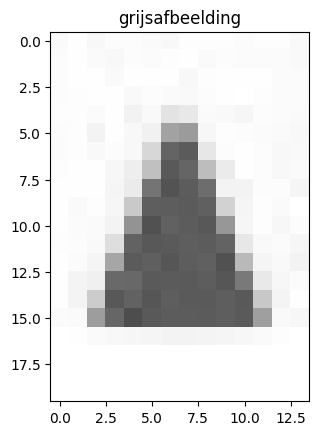

[[250 254 248 252 252 250 248 253 253 253 251 253 253 249]
 [252 254 250 248 252 251 253 254 250 252 251 251 251 249]
 [252 254 254 250 254 254 254 248 253 254 254 254 251 251]
 [252 253 254 254 249 252 250 249 252 254 255 253 251 251]
 [253 253 251 254 242 249 227 232 250 249 246 252 251 250]
 [252 253 243 254 248 241 162 155 247 253 252 251 250 248]
 [251 253 249 252 248 215 100  91 231 252 254 252 248 249]
 [253 254 254 247 238 192  89 101 189 235 254 252 248 250]
 [254 254 254 245 235 116  83  92 109 243 243 252 252 245]
 [254 250 253 246 201  94  93  91  96 210 245 253 250 255]
 [254 251 250 243 147  81  97  92  88 151 246 253 247 252]
 [253 252 249 222  98  88  90  94  92  99 231 249 251 246]
 [254 251 245 166  91  95  86  93  96  81 185 245 249 243]
 [254 244 240 105 104  90  91  90  93  86 121 233 247 251]
 [254 244 204  88  98  86  94  90  90  94  89 200 244 254]
 [251 250 157 102  77  89  92  92  91  94  90 159 249 247]
 [255 254 250 248 246 245 243 243 244 245 247 250 253 25

In [15]:
# Controleer het pad!
driehoek = cv2.imread("../_afbeeldingen/driehoek.jpg")
grijzedriehoek = cv2.cvtColor(driehoek, cv2.COLOR_BGR2GRAY)
plt_imshow("grijsafbeelding", grijzedriehoek)
print(grijzedriehoek)

Het elimineren van de kleur is dus in dit geval geen probleem. Als je aan objectdetectie doet, is het altijd belangrijk om na te denken welke info je ECHT nodig hebt. Alle extra info die je verwerkt, is enkel balast voor de computer.

<div style="background-color:#8B8000"> 
Herinner je de sentiment analyse. Hier hebben we onze data ook preprocessed (voorbereid).  
</div>

<div style="margin-bottom:-35px;">
    <font color=#690027 markdown="1">
        <h3>5.3 Drempelwaarde instellen</h3> 
    </font>
</div>


Ondanks dat we de driehoek duidelijk zien, is er nog ruimte voor discussie. Aan de buitenrand zijn namelijk een aantal pixels die lichter gekleurd zijn. Een computer kan niet werken met onzekerheden. Oftewel is de pixel deel van de driehoek, oftewel niet.

We stellen hiervoor een `drempelwaarde (of threshold)` in. 
- Alle pixels onder deze drempel krijgen een nieuwe waarde 0 (**zwart**). 
- Alle pixels boven deze drempel krijgen een nieuwe waarde 255 (**wit**).

Door deze drempelwaarde zal het voor de computer duidelijk worden wat de achtergrond is en wat de figuur. Zo kunnen de zijden van de figuren bepaald worden. Er is hier manueel gekozen voor de `drempelwaarde 127`. Je zou dit echter ook regelgebaseerd kunnen bepalen (gemiddelde, mediaan, ...)
    
Run de code hieronder, je ziet nu in de matrix duidelijk de driehoek staan.

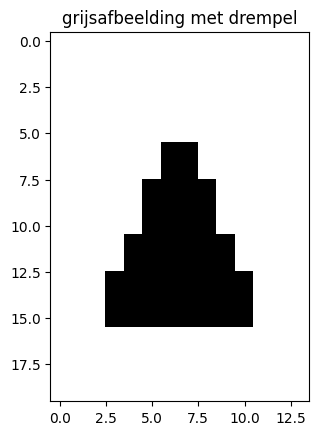

[[255 255 255 255 255 255 255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0 255 255 255 255 255 255]
 [255 255 255 255 255   0   0   0   0 255 255 255 255 255]
 [255 255 255 255 255   0   0   0   0 255 255 255 255 255]
 [255 255 255 255 255   0   0   0   0 255 255 255 255 255]
 [255 255 255 255   0   0   0   0   0   0 255 255 255 255]
 [255 255 255 255   0   0   0   0   0   0 255 255 255 255]
 [255 255 255   0   0   0   0   0   0   0   0 255 255 255]
 [255 255 255   0   0   0   0   0   0   0   0 255 255 255]
 [255 255 255   0   0   0   0   0   0   0   0 255 255 255]
 [255 255 255 255 255 255 255 255 255 255 255 255 255 25

In [14]:
# instellen drempelwaarde
# alle pixelwaarden kleiner dan 127 worden op nul gezet en al degene groter op 255
_, threshold = cv2.threshold(grijzedriehoek, 127, 255, cv2.THRESH_BINARY)
plt_imshow("grijsafbeelding met drempel", threshold)
print(threshold)


### Oefen mee 5.1
Schrijf nu zelf een stukje code die de afbeelding met alle wiskundigefiguren (`shapes.png`) omzet naar grijswaarden en daar een threshold op toepast. Baseer je op de voorgaande codeblokken.

<div style="background-color:#8B0000"> 
De matrix kan niet volledig geprint worden. Baseer je op de afbeelding om een correcte drempelwaarde te bepalen.
</div>

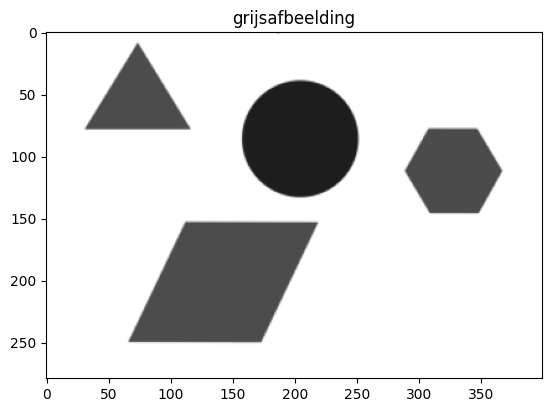

[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]


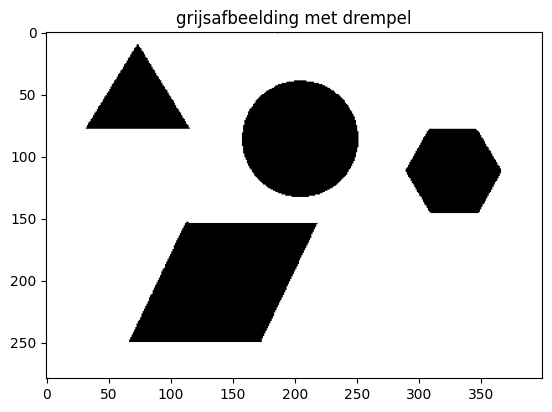

[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]


In [18]:
# Stap 1: Maak van kleurafbeelding een grijsafbeelding en toon deze.
shapes = cv2.imread("../_afbeeldingen/vormen.png")
grijzeshapes = cv2.cvtColor(shapes, cv2.COLOR_BGR2GRAY)
plt_imshow("grijsafbeelding", grijzedriehoek)
print(grijzeshapes)
# Stap 2: Stel een drempelwaarde in op de grijsafbeelding en toon deze.
_, threshold = cv2.threshold(grijzeshapes, 127, 255, cv2.THRESH_BINARY)
plt_imshow("grijsafbeelding met drempel", threshold)
print(threshold)


<div style="margin-bottom:-35px;">
    <font color=#690027 markdown="1">
        <h3>5.4 Zijden opsporen</h3> 
    </font>
</div>

De volgende stap is opsporen van de contouren die iedere vorm heeft. Hiervoor kunnen we een ingebouwde functie van opencv gebruiken.

<div style="background-color:#8B0000"> 
<b>Let Op!</b><br> de variabele <b>threshold</b> in onderstaande code, bevat de <b>grijsafbeelding an de driehoek</b>.<br> Pas deze variabele aan, naar degene die je in oefen mee 5.1 gebruikt hebt.
</div>

In [19]:
# functie die zijden zoekt
#cv2. RETR_TREE vindt alle contourlijnen en rangschikt ze, met buitenste contouren bovenaan in lijst
#cv2. CHAIN_APPROX_SIMPLE retourneert punten die nodig zijn om contourlijn te tekenen
contours, _ = cv2.findContours(threshold, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)  

Tot slot zal er een functie, aan de hand van de contouren, het aantal zijden bepalen. Vervolgens wordt op basis van dit aantal zijden een label toegevoegd aan de figuur. Een figuur met 3 zijden krijgt zo dus het label **"driehoek"**.

Voer de 2 onderstaande code-blokken uit om het resultaat van het algoritme te zien.

In [ ]:
i = 0
# lijst om alle vormnamen op te slaan
for contour in contours:
  
    # findcontour detecteert hele afbeelding als een vorm
    if i == 0:
        i = 1
        continue
  
    # functie om aantal zijden te berekenen
    zijden = cv2.approxPolyDP(
        contour, 0.01 * cv2.arcLength(contour, True), True)
      
    # functie om contouren rond elke vorm te tekenen
    # -1 zorgt ervoor dat alle contouren getekend worden, 255 voor groene kleur, 5 lijndikte
    cv2.drawContours(vormen, [contour],-1, (0, 255, 0), 5)
  
    # zoekt centrum van vorm (voor plakken van label)
    M = cv2.moments(contour)
    if M["m00"] != 0.0:
        x = int(M["m10"]/M["m00"])-35
        y = int(M["m01"]/M["m00"])
  
    # zet correcte label op centrum van de vorm
    if len(zijden) == 3:
        cv2.putText(vormen, "driehoek", (x, y),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 0), 2)
  
    elif len(zijden) == 4:
        cv2.putText(vormen, "parallellogram", (x, y),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 0), 2)
  
    elif len(zijden) == 5:
        cv2.putText(vormen, "vijfhoek", (x, y),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 0), 2)
  
    elif len(zijden) == 6:
        cv2.putText(vormen, "zeshoek", (x, y),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 0), 2)
  
    else:
        cv2.putText(vormen, "cirkel", (x, y),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 0), 2)
  


In [ ]:
# weergeven van de afbeelding met de namen van de vorm
plt_imshow("Vormen", vormen)

Dit is één voorbeeld van een detectiealgoritme. Er zijn er heel veel en sommige werken beter dan andere. Zoals al aangehaald is dit algoritme zeer simplistisch. Het geeft je echter een goede basis van wat objectdetectie inhoudt.
   

<div style="background-color:#013220">
Proficiat, je hebt jouw eerste detectiealgoritme gemaakt. Deze kan op basis van het aantal zijden de vorm van een figuur bepalen.
</div>

  <a href="https://www.aiopschool.be/dwengo/"> 
        <img src="../_afbeeldingen/bannerugentdwengo.png" alt="Dwengo" style ="display: block; margin-left: auto; margin-right: auto; margin-bottom: 30px; width:20%"/>
    </a>

Deze Notebook is gebaseerd op: Notebook AI in de landbouw, zie <a href="http://www.aiopschool.be">AI Op School</a>, van M. Benoit, F. wyffels & N. Gesquière is in licentie gegeven volgens een <a href="http://creativecommons.org/licenses/by-nc-sa/4.0/">Creative Commons Naamsvermelding-NietCommercieel-GelijkDelen 4.0 Internationaal-licentie</a>. 